# Análise de Clientes de Cartão de Crédito: Perfis de Consumo e Padrões de Comportamento

Este projeto visa analisar um conjunto de dados de clientes de cartão de crédito, identificando padrões de comportamento relacionados a transações, uso de crédito e perfil demográfico. O objetivo é entender melhor os fatores que influenciam o comportamento dos clientes, como idade, renda, tipo de cartão e escolaridade, para que se possa traçar estratégias mais eficazes de retenção e gestão de risco.

### Importação de bibliotecas


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Configurando o estilo dos gráficos para melhor visualização


In [5]:
sns.set_theme(style="whitegrid")

### Carregando os dados do csv

In [6]:
data = pd.read_csv('dataset.csv')

### Visualizando as primeiras linhas do dataset para compreender a estrutura dos dados

In [7]:
print(data.head())

          id  default  idade sexo  dependentes         escolaridade  \
0  768805383        0     45    M            3         ensino medio   
1  818770008        0     49    F            5             mestrado   
2  713982108        0     51    M            3             mestrado   
3  769911858        0     40    F            4         ensino medio   
4  709106358        0     40    M            3  sem educacao formal   

  estado_civil   salario_anual tipo_cartao  meses_de_relacionamento  \
0       casado     $60K - $80K        blue                       39   
1     solteiro  menos que $40K        blue                       44   
2       casado    $80K - $120K        blue                       36   
3           na  menos que $40K        blue                       34   
4       casado     $60K - $80K        blue                       21   

   qtd_produtos  iteracoes_12m  meses_inativo_12m limite_credito  \
0             5              3                  1      12.691,51   
1         

### Informações Gerais do Dataset

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

### Verificando valores nulos/ausentes


In [9]:
print(data.isnull().sum())

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64


### Estatísticas descritivas

In [10]:
print(data.describe())

                 id       default         idade   dependentes  \
count  1.012700e+04  10127.000000  10127.000000  10127.000000   
mean   7.391776e+08      0.160660     46.325960      2.346203   
std    3.690378e+07      0.367235      8.016814      1.298908   
min    7.080821e+08      0.000000     26.000000      0.000000   
25%    7.130368e+08      0.000000     41.000000      1.000000   
50%    7.179264e+08      0.000000     46.000000      2.000000   
75%    7.731435e+08      0.000000     52.000000      3.000000   
max    8.283431e+08      1.000000     73.000000      5.000000   

       meses_de_relacionamento  qtd_produtos  iteracoes_12m  \
count             10127.000000  10127.000000   10127.000000   
mean                 35.928409      3.812580       2.455317   
std                   7.986416      1.554408       1.106225   
min                  13.000000      1.000000       0.000000   
25%                  31.000000      3.000000       2.000000   
50%                  36.000000      

### Tratamento de valores ausentes e transformação dos dados

Durante a análise inicial, percebemos que as colunas de salario_anual, limite_credito, e valor_transacoes_12m precisam ser tratadas e convertidas para valores numéricos. Abaixo, fazemos essa transformação.

In [11]:
mapeamento_salarios = {
    'menos que $40K': 20000,
    '$40K - $60K': 50000,
    '$60K - $80K': 70000,
    '$80K - $120K': 100000,
    '$120K +': 120000,
    'na': np.nan
}

Aplicando o mapeamento para a coluna de salário anual

In [12]:
data['salario_anual'] = data['salario_anual'].map(mapeamento_salarios)

Removendo símbolos de moeda e transformando colunas de crédito e transações em valores numéricos

In [13]:
data['limite_credito'] = data['limite_credito'].str.replace(r'[^\d.]', '', regex=True).astype(float)
data['valor_transacoes_12m'] = data['valor_transacoes_12m'].str.replace(r'[^\d.]', '', regex=True).astype(float)

Verificando se as transformações foram bem-sucedidas


In [14]:
data[['salario_anual', 'limite_credito', 'valor_transacoes_12m']].head()

,salario_anual,limite_credito,valor_transacoes_12m
0,70000.0,12.69151,1.14490
1,20000.0,8.25696,1.29145
2,100000.0,3.41856,1.88772
3,20000.0,3.31303,1.17156
4,70000.0,4.71622,81608.00000


### Etapa de Análise (com Visualizações)

Distribuição de Idade

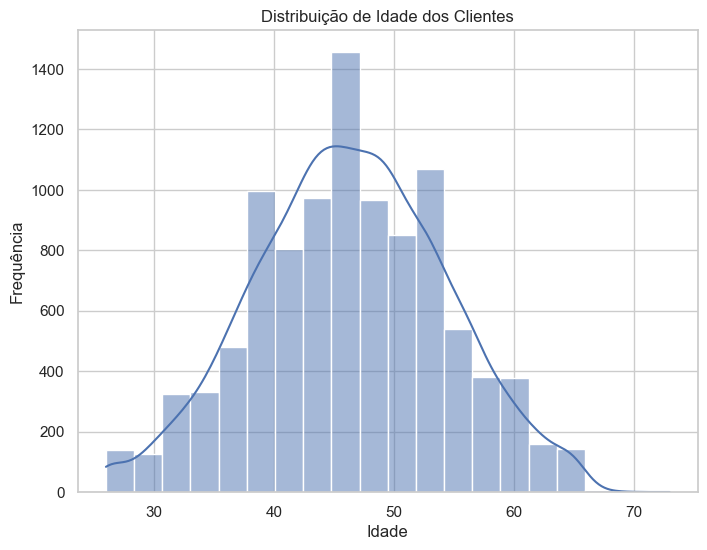

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data['idade'], bins=20, kde=True)
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Comparação de transações por faixa de salário

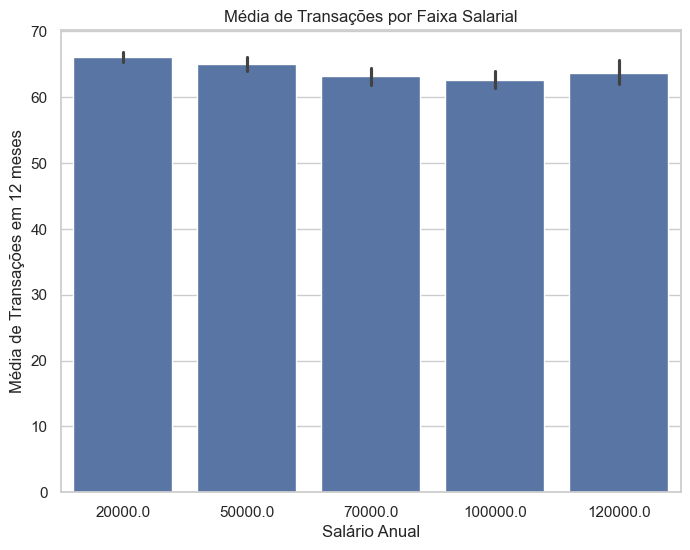

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x='salario_anual', y='qtd_transacoes_12m', data=data, estimator=np.mean)
plt.title('Média de Transações por Faixa Salarial')
plt.xlabel('Salário Anual')
plt.ylabel('Média de Transações em 12 meses')
plt.show()

Limite de crédito por tipo de cartão


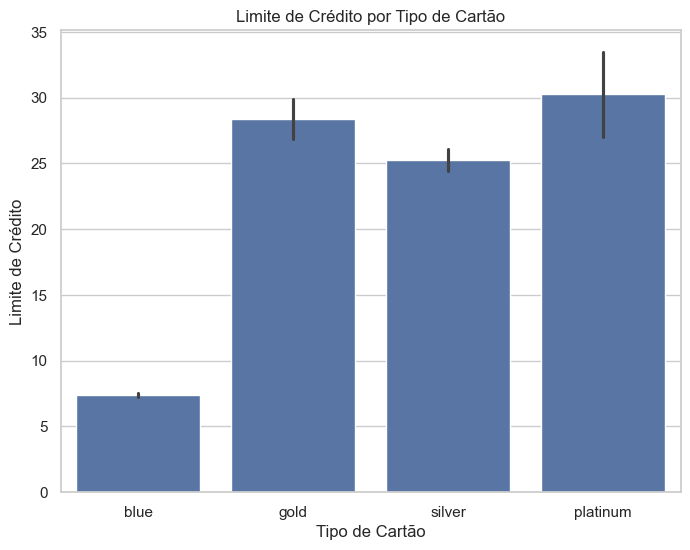

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x='tipo_cartao', y='limite_credito', data=data)
plt.title('Limite de Crédito por Tipo de Cartão')
plt.xlabel('Tipo de Cartão')
plt.ylabel('Limite de Crédito')
plt.show()

### Insights Gerados:
**Distribuição de Idade:** A maioria dos clientes está na faixa de 35 a 55 anos, indicando que a base é composta principalmente por adultos economicamente ativos.

**Quantidade de Transações por Faixa Salarial:** Observa-se que clientes com maior salário tendem a realizar mais transações, o que pode indicar maior confiança e disponibilidade financeira.

**Limite de Crédito por Tipo de Cartão:** Os clientes com cartões de categoria superior, como "Gold" ou "Platinum", têm limites de crédito significativamente maiores, em comparação aos que possuem cartões básicos, como o "Blue".